In [134]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

import seaborn as sns
from datetime import datetime, timedelta

In [135]:
#Lister les data presentent dans le dossier
#Lecture des données 

path_data = '../../data/'

print(os.listdir(path_data))

path_ = path_data + 'glucose_12-10-2019_export.csv'

df_full = pd.read_csv(path_, sep=';')

df_full.head(5)

['.DS_Store', 'fitbit', 'glucose_12-10-2019_export.csv', '.ipynb_checkpoints']


,Horodatage de l'appareil,Type d'enregistrement,Historique de la glycémie mg/dL,Numérisation de la glycémie mg/dL,Insuline à action rapide sans valeur numérique,Insuline à action rapide (unités),Alimentation sans valeur numérique,Glucides (grammes),Glucides (portions),Insuline à action longue sans valeur numérique,Insuline à action longue (unités),Remarques,Glycémie par bandelette mg/dL,Cétone mmol/L,Insuline repas (unités),Correction insuline (unités),Insuline modifiée par l'utilisateur (unités)
0,12-04-2019 02:26 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-04-2019 02:27 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-04-2019 03:16 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-04-2019 03:17 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-04-2019 05:15 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_full['Date'] = pd.to_datetime(df_full['Horodatage de l\'appareil'])
df_full['DateCp'] = df_full['Date']
df_full = df_full.sort_values(by='Date',  ascending=False)

### Récupération des données suivantes :

- Heure du repas
- Type de repas (dej, lunch, dinner)
- Unité Lente (Insuline)
- Unité Rapide (Insuline)
- Taux de glycémie (T0)
- Taux de glycémie (T-1H)
- Taux de glycémie (T-2H)
- Taux de glycémie (T-3H)
- Taux de glycémie (T-4H)

In [137]:
#Extraction des données de glucose, heure de repas, et taux d'insuline en fonction des données freestyle
df_glucose = df_full[df_full['Type d\'enregistrement'] == 0]
df_repas = df_full[df_full['Type d\'enregistrement'] == 5]
df_insuline = df_full[df_full['Type d\'enregistrement'] == 4]

df_insuline = df_insuline[['Date', 'DateCp', 'Insuline à action longue (unités)', 'Insuline à action rapide (unités)']]
df_repas = df_repas[['Type d\'enregistrement', 'Horodatage de l\'appareil' , 'Date', 'DateCp']]

df_glucose.set_index('Date', inplace=True)
df_repas.set_index('Date', inplace=True)
df_insuline.set_index('Date', inplace=True)


df_glucose['Day'] = df_glucose['DateCp'].apply(lambda x : x.date())
df_repas['Day'] = df_repas['DateCp'].apply(lambda x : x.date())
df_insuline['Day'] = df_insuline['DateCp'].apply(lambda x : x.date())

df_glucose['Time'] = df_glucose['DateCp'].apply(lambda x : x.time())
df_repas['Time'] = df_repas['DateCp'].apply(lambda x : x.time())
df_insuline['Time'] = df_insuline['DateCp'].apply(lambda x : x.time())

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [138]:
#Pour les repas du matin et du soir on regroupe l'insuline rapide et lente
df_insuline = df_insuline.groupby('Date').first()

In [139]:
df_insuline.head()

,DateCp,Insuline à action longue (unités),Insuline à action rapide (unités),Day,Time
Date,,,,,
2017-03-20 12:32:00,2017-03-20 12:32:00,NaN,9.0,2017-03-20,12:32:00
2017-03-20 15:56:00,2017-03-20 15:56:00,NaN,2.0,2017-03-20,15:56:00
2017-03-20 20:38:00,2017-03-20 20:38:00,NaN,12.0,2017-03-20,20:38:00
2017-03-21 07:34:00,2017-03-21 07:34:00,NaN,14.0,2017-03-21,07:34:00
2017-03-21 12:33:00,2017-03-21 12:33:00,NaN,12.0,2017-03-21,12:33:00


In [140]:
df_repas_insuline = pd.merge(df_insuline,df_repas, how='inner', on='DateCp')

df_repas_insuline.drop(['Day_x', 'Time_x', 'Type d\'enregistrement', 'Horodatage de l\'appareil'], axis=1, inplace=True)

In [141]:
df_repas_insuline['Date0H'] = df_repas_insuline['DateCp']
df_repas_insuline['Date-1H'] = df_repas_insuline['DateCp'].apply(lambda x : (x - timedelta(hours=1)))
df_repas_insuline['Date-2H'] = df_repas_insuline['DateCp'].apply(lambda x : (x - timedelta(hours=2)))
df_repas_insuline['Date-3H'] = df_repas_insuline['DateCp'].apply(lambda x : (x - timedelta(hours=3)))
df_repas_insuline['Date-4H'] = df_repas_insuline['DateCp'].apply(lambda x : (x - timedelta(hours=4)))

In [142]:
df_repas_insuline.head()

,DateCp,Insuline à action longue (unités),Insuline à action rapide (unités),Day_y,Time_y,Date0H,Date-1H,Date-2H,Date-3H,Date-4H
0,2019-06-14 09:03:00,16.0,16.0,2019-06-14,09:03:00,2019-06-14 09:03:00,2019-06-14 08:03:00,2019-06-14 07:03:00,2019-06-14 06:03:00,2019-06-14 05:03:00
1,2019-06-14 13:21:00,NaN,6.0,2019-06-14,13:21:00,2019-06-14 13:21:00,2019-06-14 12:21:00,2019-06-14 11:21:00,2019-06-14 10:21:00,2019-06-14 09:21:00
2,2019-06-15 08:52:00,14.0,13.0,2019-06-15,08:52:00,2019-06-15 08:52:00,2019-06-15 07:52:00,2019-06-15 06:52:00,2019-06-15 05:52:00,2019-06-15 04:52:00
3,2019-06-15 12:49:00,NaN,6.0,2019-06-15,12:49:00,2019-06-15 12:49:00,2019-06-15 11:49:00,2019-06-15 10:49:00,2019-06-15 09:49:00,2019-06-15 08:49:00
4,2019-06-16 08:51:00,14.0,13.0,2019-06-16,08:51:00,2019-06-16 08:51:00,2019-06-16 07:51:00,2019-06-16 06:51:00,2019-06-16 05:51:00,2019-06-16 04:51:00


In [143]:
#Glucose mg/dL 
#Recuperation du taux de glucose au moment du repas
df_repas_insuline['Glucose0H'] = df_repas_insuline['Date0H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])
df_repas_insuline['Glucose-1H'] = df_repas_insuline['Date-1H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])
df_repas_insuline['Glucose-2H'] = df_repas_insuline['Date-2H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])
df_repas_insuline['Glucose-3H'] = df_repas_insuline['Date-3H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])
df_repas_insuline['Glucose-4H'] = df_repas_insuline['Date-4H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])

In [144]:
df_repas_insuline.drop(['Date0H', 'Date-1H', 'Date-2H', 'Date-3H', 'Date-4H'], axis=1, inplace=True)
df_repas_insuline.rename(columns={"Day_y": "Day", "Time_y": "Time","Insuline à action longue (unités)": "Lente", "Insuline à action rapide (unités)": "Rapide" }, inplace=True)
df_repas_insuline.head()

,DateCp,Lente,Rapide,Day,Time,Glucose0H,Glucose-1H,Glucose-2H,Glucose-3H,Glucose-4H
0,2019-06-14 09:03:00,16.0,16.0,2019-06-14,09:03:00,108.0,101.0,100.0,105.0,110.0
1,2019-06-14 13:21:00,NaN,6.0,2019-06-14,13:21:00,124.0,144.0,194.0,163.0,104.0
2,2019-06-15 08:52:00,14.0,13.0,2019-06-15,08:52:00,67.0,73.0,74.0,83.0,88.0
3,2019-06-15 12:49:00,NaN,6.0,2019-06-15,12:49:00,46.0,58.0,101.0,86.0,67.0
4,2019-06-16 08:51:00,14.0,13.0,2019-06-16,08:51:00,109.0,92.0,86.0,78.0,77.0


In [145]:
def getRepas(timestamp_):
    
    current_time = timestamp_.time()
        
    hour_max_breakfast = datetime.strptime('11::00::00', '%H::%M::%S').time()
    hour_max_lunch = datetime.strptime('16::00::00', '%H::%M::%S').time()
    hour_max_dinner = datetime.strptime('21::00::00', '%H::%M::%S').time()
    
    if current_time < hour_max_breakfast:
        return 0
    elif current_time > hour_max_breakfast and current_time < hour_max_lunch:
        return 1
    elif current_time > hour_max_lunch and current_time < hour_max_dinner:
        return 2
    else:
        return 3

#determine le type de repas (dej, lunch, dinner)
df_repas_insuline['RepasType'] = df_repas_insuline['DateCp'].apply(lambda x: getRepas(x))

In [146]:
df_repas_insuline.head()

,DateCp,Lente,Rapide,Day,Time,Glucose0H,Glucose-1H,Glucose-2H,Glucose-3H,Glucose-4H,RepasType
0,2019-06-14 09:03:00,16.0,16.0,2019-06-14,09:03:00,108.0,101.0,100.0,105.0,110.0,0
1,2019-06-14 13:21:00,NaN,6.0,2019-06-14,13:21:00,124.0,144.0,194.0,163.0,104.0,1
2,2019-06-15 08:52:00,14.0,13.0,2019-06-15,08:52:00,67.0,73.0,74.0,83.0,88.0,0
3,2019-06-15 12:49:00,NaN,6.0,2019-06-15,12:49:00,46.0,58.0,101.0,86.0,67.0,1
4,2019-06-16 08:51:00,14.0,13.0,2019-06-16,08:51:00,109.0,92.0,86.0,78.0,77.0,0


In [147]:
# Y = Glucose 2h après le repas

df_repas_insuline['Glucose+2H'] = df_repas_insuline['DateCp'] \
                                .apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x + timedelta(hours=2),method='nearest')]
                                       ['Historique de la glycémie mg/dL'])

In [148]:
#Time Encoding
df_repas_insuline['Year'] = df_repas_insuline['DateCp'].apply(lambda x : x.year)
df_repas_insuline['Month'] = df_repas_insuline['DateCp'].apply(lambda x : x.month)
df_repas_insuline['Day'] = df_repas_insuline['DateCp'].apply(lambda x : x.day)
df_repas_insuline['DayOfWeek'] = df_repas_insuline['DateCp'].apply(lambda x : x.dayofweek)
df_repas_insuline['Hour'] = df_repas_insuline['DateCp'].apply(lambda x : x.hour)

In [149]:
df_repas_insuline.drop(['DateCp', 'Time'], axis=1, inplace=True)
#df_repas_insuline.drop(['Time'], axis=1, inplace=True)
df_repas_insuline.head()

,Lente,Rapide,Day,Glucose0H,Glucose-1H,Glucose-2H,Glucose-3H,Glucose-4H,RepasType,Glucose+2H,Year,Month,DayOfWeek,Hour
0,16.0,16.0,14,108.0,101.0,100.0,105.0,110.0,0,197.0,2019,6,4,9
1,NaN,6.0,14,124.0,144.0,194.0,163.0,104.0,1,145.0,2019,6,4,13
2,14.0,13.0,15,67.0,73.0,74.0,83.0,88.0,0,101.0,2019,6,5,8
3,NaN,6.0,15,46.0,58.0,101.0,86.0,67.0,1,88.0,2019,6,5,12
4,14.0,13.0,16,109.0,92.0,86.0,78.0,77.0,0,156.0,2019,6,6,8


In [150]:
df_repas_insuline.dtypes

Lente         float64
Rapide        float64
Day             int64
Glucose0H     float64
Glucose-1H    float64
Glucose-2H    float64
Glucose-3H    float64
Glucose-4H    float64
RepasType       int64
Glucose+2H    float64
Year            int64
Month           int64
DayOfWeek       int64
Hour            int64
dtype: object

# Glucose / Jour
Analyse des données de glycemie par jour
- moyenne
- ecart type

In [170]:
df_glucose = df_glucose[['Historique de la glycémie mg/dL', 'DateCp', 'Day', 'Time']]
df_glucose.rename(columns={'Historique de la glycémie mg/dL': 'Glucose'}, inplace=True)

In [171]:
df_glucose.head()

,Glucose,DateCp,Day,Time
Date,,,,
2019-12-10 19:37:00,150.0,2019-12-10 19:37:00,2019-12-10,19:37:00
2019-12-10 19:22:00,156.0,2019-12-10 19:22:00,2019-12-10,19:22:00
2019-12-10 19:07:00,166.0,2019-12-10 19:07:00,2019-12-10,19:07:00
2019-12-10 18:52:00,169.0,2019-12-10 18:52:00,2019-12-10,18:52:00
2019-12-10 18:37:00,150.0,2019-12-10 18:37:00,2019-12-10,18:37:00


In [196]:
#Pandas Serie correspondant au taux moyen de sucre
taux_moyen_per_day  = df_glucose.groupby('Day')['Glucose'].mean()

#Il faudrait que le taux de glucose moyen journalier se situe entre 90 / 120mg/dL

#Nombre de jours disponibles pour l'analyse: 
print('Jours disponibles :', taux_moyen_per_day.shape[0])
print('\n')
#Moyenne sur les jours 
mean = taux_moyen_per_day.mean()
print('Moyenne / Jours disponibles :', mean)

std = taux_moyen_per_day.std()
print('Std / Jours disponibles :', std)

Jours disponibles : 188


Moyenne / Jours disponibles : 152.46084848932853
Std / Jours disponibles : 33.365264399967856


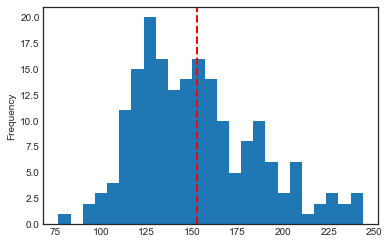

In [192]:
#Taux moyen journalier
taux_moyen_per_day.plot.hist(bins=25)

plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)

In [202]:
#Jours passés au dessus de 175mg/dL
(taux_moyen_per_day > 175).sum()

47

In [213]:
df_glucose.head()

,Glucose,DateCp,Day,Time
Date,,,,
2019-12-10 19:37:00,150.0,2019-12-10 19:37:00,2019-12-10,19:37:00
2019-12-10 19:22:00,156.0,2019-12-10 19:22:00,2019-12-10,19:22:00
2019-12-10 19:07:00,166.0,2019-12-10 19:07:00,2019-12-10,19:07:00
2019-12-10 18:52:00,169.0,2019-12-10 18:52:00,2019-12-10,18:52:00
2019-12-10 18:37:00,150.0,2019-12-10 18:37:00,2019-12-10,18:37:00


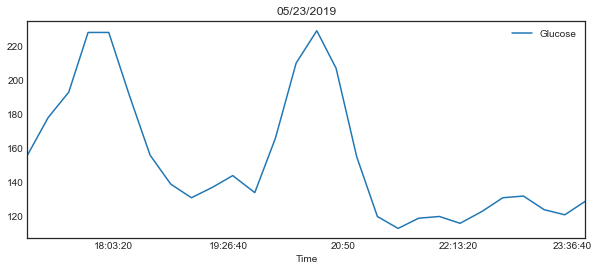

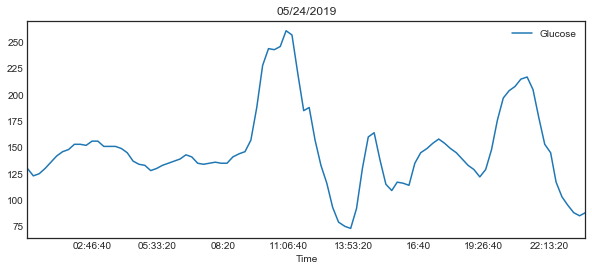

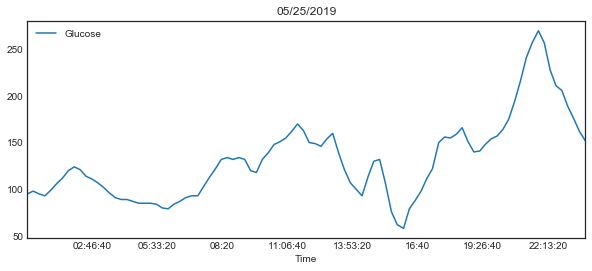

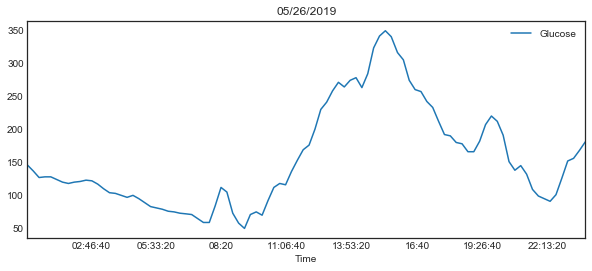

In [221]:
df_glucose = df_glucose.sort_values('DateCp', ascending=False)

iter_ = 0

for group in df_glucose.groupby(['Day']):
    df_glucose_day = group[1]
    title_ = df_glucose_day.iloc[0]['DateCp'].strftime("%m/%d/%Y")
    df_glucose_day.plot(x='Time', y='Glucose', figsize=(10,4), title=title_)
    iter_ = iter_ + 1
    if iter_ > 3:
        break

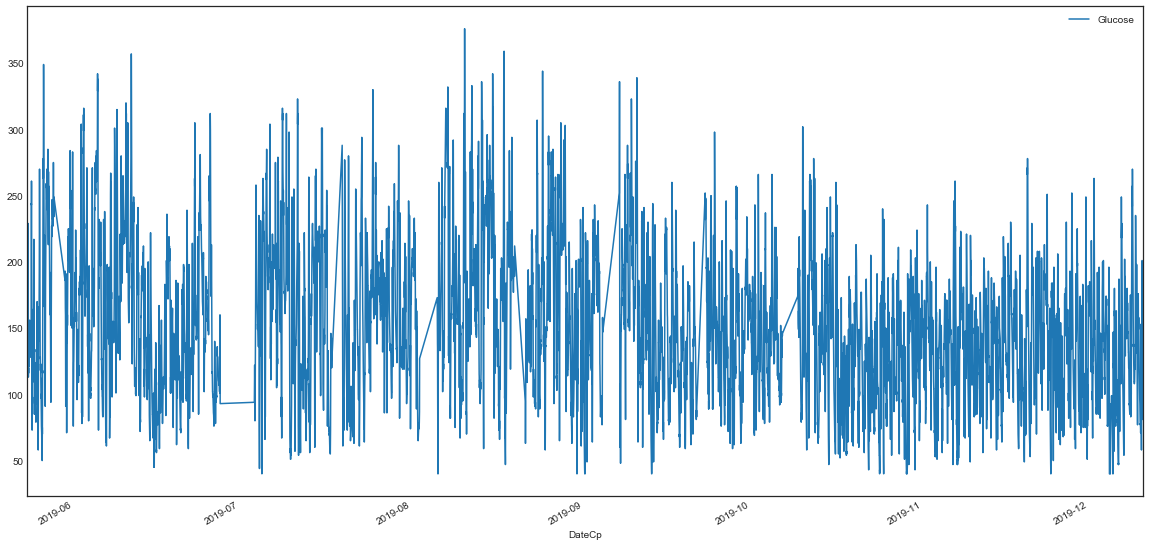

In [226]:
df_glucose.plot(x='DateCp', y='Glucose', figsize=(20,10))

In [199]:
df_glucose_analyse = df_glucose.groupby('Day')['Glucose'].describe()

In [200]:
df_glucose_analyse.head()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
2019-05-23,28.0,154.642857,37.968032,113.0,123.75,138.0,181.25,229.0
2019-05-24,96.0,147.802083,39.219657,73.0,130.00,141.5,156.00,261.0
2019-05-25,96.0,131.500000,43.947816,58.0,95.75,123.0,154.25,270.0
2019-05-26,96.0,155.572917,76.701300,50.0,98.50,128.0,201.75,349.0
2019-05-27,96.0,217.156250,49.784447,94.0,187.00,239.0,253.50,285.0


# Glucose +2H prediction

Le code suivant permet d'essayer de prédire le taux de glucose deux heures après le repas

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

In [152]:
#Drop NaN
df_repas_insuline = df_repas_insuline.fillna(0.0)

In [153]:
#correlation matrix
corr_matrix = df_repas_insuline.corr()
corr_matrix["Glucose+2H"].sort_values(ascending=False)

Glucose+2H    1.000000
Glucose0H     0.477938
Glucose-1H    0.332591
Glucose-2H    0.226910
Glucose-3H    0.208935
Glucose-4H    0.204758
Lente         0.140596
Rapide        0.078411
RepasType     0.014508
Hour          0.007724
Day          -0.029330
DayOfWeek    -0.048110
Month        -0.220879
Year               NaN
Name: Glucose+2H, dtype: float64

In [154]:
y = df_repas_insuline['Glucose+2H'].values
X = df_repas_insuline.loc[:, df_repas_insuline.columns != 'Glucose+2H'].values

In [155]:
attributes = df_repas_insuline.loc[:, df_repas_insuline.columns != 'Glucose+2H'].columns

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [98]:
y_train.shape

(328,)

In [107]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [105]:
# Select a linear model
model = LinearRegression() # Train the model
model.fit(X_train, y_train)

#So in our model, 29% of the variability in Y can be explained using X
#Not that much... 
print(model.score(X_train, y_train))

y_pred = model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.2991314667977286
53.899299272945214


In [109]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

scores = cross_val_score(tree_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

#So in our model, 29% of the variability in Y can be explained using X
#Not that much... 
#print(tree_reg.score(X_train, y_train))

#y_pred = tree_reg.predict(X_test)
#lin_mse = mean_squared_error(y_test, y_pred)
#lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)

Scores: [79.36872142 50.12257702 73.4153811  80.55037949 88.73812341 72.6700722
 64.76180131 86.2354072  84.78281076 68.75431805]
Mean: 74.93995919501438
Standard deviation: 11.095878497778179


In [110]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

54.77927340865998


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50, 100, 150, 200, 250], 'max_features': [2, 4, 6, 8, 10, 13]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 4, 6, 8, 10, 13]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 1

In [130]:
#grid_search.best_params_
#grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print('\n\n')
print('Best estimator')
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

61.82300003504629 {'max_features': 2, 'n_estimators': 3}
53.31428960053539 {'max_features': 2, 'n_estimators': 10}
53.52439693329735 {'max_features': 2, 'n_estimators': 30}
53.28582759000013 {'max_features': 2, 'n_estimators': 50}
53.433564543431615 {'max_features': 2, 'n_estimators': 100}
53.3113180915002 {'max_features': 2, 'n_estimators': 150}
53.19588962951564 {'max_features': 2, 'n_estimators': 200}
53.30033708903611 {'max_features': 2, 'n_estimators': 250}
64.139546586442 {'max_features': 4, 'n_estimators': 3}
55.90376012703853 {'max_features': 4, 'n_estimators': 10}
53.826288427503144 {'max_features': 4, 'n_estimators': 30}
52.52770596459014 {'max_features': 4, 'n_estimators': 50}
53.1438416142867 {'max_features': 4, 'n_estimators': 100}
52.75302280605493 {'max_features': 4, 'n_estimators': 150}
52.94083985994385 {'max_features': 4, 'n_estimators': 200}
53.00499703410393 {'max_features': 4, 'n_estimators': 250}
59.70883224194287 {'max_features': 6, 'n_estimators': 3}
53.63937595

In [131]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

sorted(zip(feature_importances, attributes), reverse=True)

[(0.28868500101460043, 'Glucose0H'),
 (0.10272680896691731, 'Glucose-2H'),
 (0.10150467440845232, 'Glucose-1H'),
 (0.08483728009922496, 'Glucose-3H'),
 (0.08387208547797444, 'Glucose-4H'),
 (0.07510739309551077, 'Month'),
 (0.07145467882430415, 'Day'),
 (0.05522026487198081, 'Rapide'),
 (0.04938651867285796, 'Hour'),
 (0.04292402316457793, 'DayOfWeek'),
 (0.027696090024467376, 'Lente'),
 (0.01658518137913163, 'RepasType'),
 (0.0, 'Year')]

In [132]:
y_pred = model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred) 
final_rmse = np.sqrt(final_mse) # => evaluates to 49.16
print(final_rmse)

49.424004243368024
